<a href="https://colab.research.google.com/github/sam1610/MimiProjects/blob/main/projet_1_ALBITAR_AMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

ALBITAR Nadia 
AMRI Malek 


Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import random
%matplotlib inline 

In [ ]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        # ------------------------------
        cpt=0
        for x in range(len(desc_set)):
            if self.predict(desc_set[x]) == label_set[x]:
                cpt+=1
        return cpt/len(desc_set)
        # ------------------------------
  

In [ ]:
#Clasifieur KNN 

class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension= input_dimension
        self.k=k
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        tab=[]
        for i in range(len(self.desc_set)):
            tab.append(np.linalg.norm(x-self.desc_set[i]))
        tab2=np.argsort(tab,axis=0)
        tab2=tab2[:self.k]
        cpt=0
        for i in (tab2):
            if self.label_set[i]==1:
                cpt+=1
        cpt=cpt/self.k
        return 2*(cpt-0.5)
        
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        pred_score=self.score(x)
        if pred_score<0:
            return -1
        else:
            return 1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set=desc_set
        self.label_set=label_set

In [ ]:
#classifieur perceptron 

class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.learning_rate=learning_rate
        self.input_dimension=input_dimension
        if init==0:
            self.w = np.zeros(input_dimension)
        elif init==1:
            #np.random.uniform(0,1,input_dimension) sinon
            self.v=np.zeros(input_dimension)
            for i in range(input_dimension):
                self.v[i]=random.rand()
                self.v[i]= self.v[i] *2 -1
                self.v[i] = 0.001*self.v[i]
            self.w=self.v
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """   
        l=[i for i in range(len(desc_set))]
        np.random.shuffle(l) 
        
        for i in l:
            s =self.predict(desc_set[i])
            if s!=label_set[i]: 
                 self.w+= self.learning_rate*label_set[i]*desc_set[i]
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.01):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """     
        l_norme=[]
        old_w=self.w.copy()
        for i in range(niter_max):
            self.train_step(desc_set,label_set)
            norme= np.linalg.norm(self.w-old_w)
            l_norme.append(norme)
            if norme<=seuil:
                return l_norme
        return l_norme           

    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x, self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        pred_score=self.score(x)
        if pred_score<0:
            return -1
        else:
            return 1
    

In [ ]:
#import fonction pour représentation graphique
def plot2DSet(array1,array2):

    data2_negatifs = array1[array2 == -1]

    data2_positifs = array1[array2== +1]

    plt.scatter(data2_negatifs[:,0],data2_negatifs[:,1],marker='o', color="red") # 'o' rouge pour la classe -1
    plt.scatter(data2_positifs[:,0],data2_positifs[:,1],marker='x', color="blue")
    
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])
    
from matplotlib import cm
def plot_frontiere_3D(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.score(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer f en 3D:
    fig = plt.gcf()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('f(X)')

    surf = ax.plot_surface(x1grid,x2grid,res, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    negatifs = desc_set[label_set == -1]
    # Ensemble des exemples de classe +1:
    positifs = desc_set[label_set == +1]
    # Affichage de l'ensemble des exemples :
    ax.scatter(negatifs[:,0],negatifs[:,1],-1,marker='o', color="red") # 'o' pour la classe -1
    ax.scatter(positifs[:,0],positifs[:,1],1,marker='x', color="blue") # 'x' pour la classe +1
    ax.view_init(40, 170) # a régler en fonction des données

In [ ]:
def crossval(X, Y, n_iterations, iteration):
    longueur=len(X)//n_iterations
    l2X=[]
    l2Y=[]
    x=0
    i=0
    while (i<n_iterations):
        lX=X[x:longueur+x]
        lY=Y[x:longueur+x]
        x+=longueur
        i+=1
        l2X.append(lX)
        l2Y.append(lY)
    
    Xtest=np.asarray(l2X[iteration])  
    Ytest=np.asarray(l2Y[iteration])
    
    #concatenate parce que qu'on ne veut pas liste de liste
    Xa=np.asarray(l2X[:iteration]+l2X[iteration+1:])
    Xapp=Xa.flatten()
    Ya=np.asarray(l2Y[:iteration]+l2Y[iteration+1:])
    Yapp=Ya.flatten()
    return Xapp, Yapp, Xtest, Ytest


In [ ]:
name_pd= pd.read_csv("names.csv", sep=';')
test_pd=  pd.read_csv("test.csv", sep=';', header= None, names=name_pd.keys())
eval_pd=  pd.read_csv("eval.csv", sep=';', header= None, names=name_pd.keys())
train_pd = pd.read_csv("train.csv", sep=';', header= None, names=name_pd.keys()) #chemin a changer

FileNotFoundError: ignored

In [ ]:
eval_pd.head()                  

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label
0,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Construction du dataset et labelset pour faire le train du classifieur 
datasetTrain= []
labelsetTrain=[]
l, c = train_pd.shape
for i in range(l):
    datasetTrain.append(np.array(train_pd.loc[i].tolist()[1:c-1]))
    labelsetTrain.append(train_pd.loc[i].tolist()[c-1])

### Experimentations Classifieur KNN


In [ ]:
# on stocke les accuracies dans une liste :
accuracies = []

# seuil max des valeurs de k à regarder:
seuil_k = len(datasetTrain) // 20

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]

for i in valeurs_k:
    classifierKNN2 = ClassifierKNN(784,i)
    classifierKNN2.train(datasetTrain, labelsetTrain)
    accuracies.append(classifierKNN2.accuracy(datasetTrain, labelsetTrain))

# ---------------------------------------------
for i in range(0,len(valeurs_k)):
    print("Accuracy pour ",valeurs_k[i],":",accuracies[i])
    

Accuracy pour  1 : 1.0
Accuracy pour  3 : 0.968
Accuracy pour  5 : 0.965
Accuracy pour  7 : 0.967
Accuracy pour  9 : 0.962
Accuracy pour  11 : 0.957
Accuracy pour  13 : 0.955
Accuracy pour  15 : 0.951
Accuracy pour  17 : 0.948
Accuracy pour  19 : 0.951
Accuracy pour  21 : 0.949
Accuracy pour  23 : 0.944
Accuracy pour  25 : 0.937
Accuracy pour  27 : 0.937
Accuracy pour  29 : 0.935
Accuracy pour  31 : 0.933
Accuracy pour  33 : 0.932
Accuracy pour  35 : 0.925
Accuracy pour  37 : 0.927
Accuracy pour  39 : 0.924
Accuracy pour  41 : 0.925
Accuracy pour  43 : 0.922
Accuracy pour  45 : 0.925
Accuracy pour  47 : 0.924
Accuracy pour  49 : 0.924


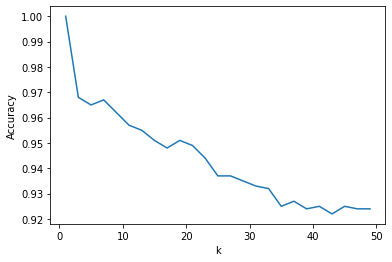

In [ ]:
#representation graphique variaition de l'accuracy en fonction de k
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

In [ ]:
#Evaluation du classifieur en utilisant le data set test_pd 
dataset2=[]
labelset2=[]
for i in range(l):
    dataset2.append(np.array(test_pd.loc[i].tolist()[1:c-1]))
    labelset2.append(test_pd.loc[i].tolist()[c-1])

In [ ]:
classifieurKNNTest= ClassifierKNN(784, 3) 

classifieurKNNTest.train(datasetTrain, labelsetTrain) #train du classifuer avec k=3 uniquement 

for i in range(900,910):
    print("prediction: ", classifieurKNNTest.predict(dataset2[i:]), "valeure label: ",labelset2[i] )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", classifieurKNNTest.accuracy(dataset2,labelset2))   

NameError: ignored

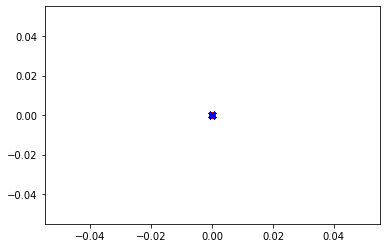

In [ ]:
#PB : ne fonctionne pas !!!
#representations graphiques 2D
plot2DSet(np.array(dataset2),np.array(labelset2))  
# plot_frontiere(np.array(dataset2),np.array(labelset2),classifieurKNNTest)
plot2DSet(np.array(dataset2),np.array(labelset2))  

### Expérimentations Perceptron

In [ ]:
#Choix du learning_rate
#PB valeurs chagent a chaque fois !!!
accuracies=[]
list_learning_rates=[]
for l in np.arange(0.01, 1, 0.02):
    perceptron1 =ClassifierPerceptron(784,l,0)
    perceptron1.train(datasetTrain,labelsetTrain)
    accuracies.append(perceptron1.accuracy(dataset2,labelset2))
    list_learning_rates.append(l)
    print("Accuracy pour l = ",l," : ", perceptron1.accuracy(dataset2,labelset2))
    
maximum=max(accuracies)
learning_rate=list_learning_rates[accuracies.index(maximum)]
print(maximum)
print(learning_rate)

Accuracy pour l =  0.01  :  0.871
Accuracy pour l =  0.03  :  0.873
Accuracy pour l =  0.049999999999999996  :  0.866
Accuracy pour l =  0.06999999999999999  :  0.867
Accuracy pour l =  0.08999999999999998  :  0.865
Accuracy pour l =  0.10999999999999997  :  0.864
Accuracy pour l =  0.12999999999999998  :  0.866
Accuracy pour l =  0.15  :  0.871
Accuracy pour l =  0.16999999999999998  :  0.869
Accuracy pour l =  0.18999999999999997  :  0.87
Accuracy pour l =  0.20999999999999996  :  0.867
Accuracy pour l =  0.22999999999999998  :  0.874
Accuracy pour l =  0.24999999999999997  :  0.882
Accuracy pour l =  0.26999999999999996  :  0.875
Accuracy pour l =  0.29  :  0.865
Accuracy pour l =  0.30999999999999994  :  0.871
Accuracy pour l =  0.32999999999999996  :  0.866
Accuracy pour l =  0.35  :  0.868
Accuracy pour l =  0.36999999999999994  :  0.866
Accuracy pour l =  0.38999999999999996  :  0.865
Accuracy pour l =  0.4099999999999999  :  0.872
Accuracy pour l =  0.42999999999999994  :  0.87

In [ ]:
#tester différenttes valeurs niter_max et seuil ???
print(learning_rate)
perceptron2 =ClassifierPerceptron(784,learning_rate,0)

#entrainement
perceptron2.train(datasetTrain,labelsetTrain)

#accuracy
print("Accuracy finale train : ", perceptron2.accuracy(datasetTrain,labelsetTrain))

#test
print("Accuracy avec datasetTest : ",perceptron2.accuracy(dataset2,labelset2))

0.24999999999999997
Accuracy finale train :  1.0
Accuracy avec datasetTest :  0.865


In [ ]:
#exemples de tests de classifieurs : validation croisée(crossval TME4)
#trouver d'autres tests

###Comparaison des classifieurs 

In [ ]:
#cell pour mettre les comparaisons et expliquer le choix du classifieur : ici choix KNN car accuracy avec datasetTest plus importante

# Classification multiclasses
A deplacer (mis ici temporairement pour éviter l'excécution d'une heure des predict sur eval)

In [ ]:
class Perceptron_MC(Classifier):
    """ Perceptron pour faire la prédiction multi-classe
    """
    def __init__(self, input_dimension,learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (espace originel)
                -classes 
        """        
        self.input_dimension= input_dimension
        self.learning_rate=learning_rate
       
        self.l_Perceptrons=[]
            
                
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments: (dans l'espace originel)
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """ 
        
        lClasses=[]
        for x in label_set:
            if x not in lClasses:
                lClasses.append(x)
        lClasses=np.sort(lClasses)        

        for y in lClasses:
            label_temp=[]
            for i in label_set:
                if i==y:
                    label_temp.append(1)
                else:
                    label_temp.append(-1)
            Percep=ClassifierPerceptron(self.input_dimension,self.learning_rate)
            Percep.train(desc_set,label_temp)
            self.l_Perceptrons.append(Percep)
            
    
    def score(self,x):
        """ rend le score de prédiction sur x 
            x: une description (dans l'espace originel)
        """
        if self.l_Perceptrons !=[]:
            l_Scores=[]
            l_P=self.l_Perceptrons
            for p in l_P:
                l_Scores.append(p.score(x))
            return l_Scores
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description (dans l'espace originel)
        """ 
        return np.argmax(self.score(x))

In [ ]:
import copy 

def ClassifierMultiOAA(Classifier):
    """ Classifieur générique multi-classe
    """
    def __init__(self, input_dimension,learning_rate,classifier, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (espace originel)
            
        """        
        self.input_dimension= input_dimension
        self.learning_rate=learning_rate
       
        self.l_Classifiers=[]
        self.classifier=classifier
                
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments: (dans l'espace originel)
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """ 
        
        lClasses=[]
        for x in label_set:
            if x not in lClasses:
                lClasses.apppend(x)
        lClasses=np.sort(lClasses)        

        for y in lClasses:
            label_temp=[]
            for i in label_set:
                if i==y:
                    label_temp.append(1)
                else:
                    label_temp.append(-1)
            Classi=copy.deepcopy(self.classifier)
            Classi.train(desc_set,label_temp)
            self.l_Classifiers.append(Classi)
            
    
    def score(self,x):
        """ rend le score de prédiction sur x 
            x: une description (dans l'espace originel)
        """
        if self.l_Classifiers !=[]:
            l_Scores=[]
            l_C=self.l_Classifiers
            for c in l_C:
                l_Scores.append(c.score(x))
            return l_Scores
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description (dans l'espace originel)
        """ 
        return np.argmax(self.score(x))

In [ ]:
nameMulti_pd= pd.read_csv("C:/Users/ANadi/Documents/LU3IN026 - Science des données/projet 1/Bases_IADS_multiclasses/names_multi.csv", sep=';')
testMulti_pd=  pd.read_csv("C:/Users/ANadi/Documents/LU3IN026 - Science des données/projet 1/Bases_IADS_multiclasses/test_multi.csv", sep=';', header= None, names=name_pd.keys())
evalMulti_pd=  pd.read_csv("C:/Users/ANadi/Documents/LU3IN026 - Science des données/projet 1/Bases_IADS_multiclasses/eval_multi.csv", sep=';', header= None, names=name_pd.keys())
trainMulti_pd = pd.read_csv("C:/Users/ANadi/Documents/LU3IN026 - Science des données/projet 1/Bases_IADS_multiclasses/train_multi.csv", sep=';', header= None, names=name_pd.keys()) #chemin a changer

In [ ]:
evalMulti_pd.head()

,ident,A001,A002,A003,A004,A005,A006,A007,A008,A009,...,A776,A777,A778,A779,A780,A781,A782,A783,A784,label
0,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [ ]:
#Construction des datasets train et test (change les noms) : multi_T = train, 2 = test pour l'instant
dataset_multi_T= []
dataset_multi2= []
labelset_multi_T=[]
labelset_multi2=[]

l, c = train_pd.shape

for i in range(l):
    dataset_multi_T.append(np.array(trainMulti_pd.loc[i].tolist()[1:c-1]))
    labelset_multi_T.append(trainMulti_pd.loc[i].tolist()[c-1])
    
    dataset_multi2.append(np.array(testMulti_pd.loc[i].tolist()[1:c-1]))
    labelset_multi2.append(testMulti_pd.loc[i].tolist()[c-1])

### Expérimentations perceptron

In [ ]:
accuraciesM=[]
list_learning_ratesM=[]
for l in np.arange(0.01, 1, 0.02):
    perceptronM =Perceptron_MC(784,l,0)
    perceptronM.train(dataset_multi_T,labelset_multi_T)
    accuraciesM.append(perceptronM.accuracy(dataset_multi2,labelset_multi2))
    list_learning_ratesM.append(l)
    print("Accuracy pour l = ",l," : ", perceptronM.accuracy(dataset_multi2,labelset_multi2))
    
maxi=max(accuraciesM)
l_rate=list_learning_ratesM[accuraciesM.index(maxi)]
print("Accuracy max = ",maxi," pour le learning rate = ",l_rate)

Accuracy pour l =  0.01  :  0.954
Accuracy pour l =  0.03  :  0.953
Accuracy pour l =  0.049999999999999996  :  0.955
Accuracy pour l =  0.06999999999999999  :  0.956
Accuracy pour l =  0.08999999999999998  :  0.959
Accuracy pour l =  0.10999999999999997  :  0.959
Accuracy pour l =  0.12999999999999998  :  0.958
Accuracy pour l =  0.15  :  0.964
Accuracy pour l =  0.16999999999999998  :  0.96
Accuracy pour l =  0.18999999999999997  :  0.959
Accuracy pour l =  0.20999999999999996  :  0.961
Accuracy pour l =  0.22999999999999998  :  0.956
Accuracy pour l =  0.24999999999999997  :  0.964
Accuracy pour l =  0.26999999999999996  :  0.964
Accuracy pour l =  0.29  :  0.957
Accuracy pour l =  0.30999999999999994  :  0.958
Accuracy pour l =  0.32999999999999996  :  0.961
Accuracy pour l =  0.35  :  0.963
Accuracy pour l =  0.36999999999999994  :  0.954
Accuracy pour l =  0.38999999999999996  :  0.959
Accuracy pour l =  0.4099999999999999  :  0.961
Accuracy pour l =  0.42999999999999994  :  0.95

In [ ]:
perceptronM2 =ClassifierPerceptron(784,l_rate,0)

#entrainement
perceptronM2.train(dataset_multi_T,labelset_multi_T)

#accuracy 
#PB : accuracy ne marche pas pour dataset de train mais marche pour le reste 
print("Accuracy finale train : ", perceptronM2.accuracy(dataset_multi_T,dataset_multi_T))

#test
print("Accuracy avec datasetTest : ",perceptronM2.accuracy(dataset_multi2,labelset_multi2))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Expérimentations KNN

In [ ]:
# on stocke les accuracies dans une liste :
accuraciesM2 = []

# seuil max des valeurs de k à regarder:
seuil_k = len(datasetTrain) // 20

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]

for i in valeurs_k:
    classifierKNN_MC = ClassifierMultiOAA(784,l_rate,ClassifierKNN(784, i))
    classifierKNN_MC.train(datasetTrain, labelsetTrain)
    accuraciesM2.append(classifierKNN2.accuracy(datasetTrain, labelsetTrain))

# ---------------------------------------------
for i in range(0,len(valeurs_k)):
    print("Accuracy pour ",valeurs_k[i],":",accuraciesM2[i])



TypeError: ClassifierMultiOAA() takes 1 positional argument but 3 were given

In [ ]:
#representation graphique variaition de l'accuracy en fonction de k
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

# Traitement d'eval avec le meilleur classifier : KNN 

In [ ]:
#prediction sur le fichier eval avec le meilleur classifieur trouvé
datasetEval=[]
labelsetEval=[]
l, c = train_pd.shape
#print(datasetEval.append(np.array(eval_pd.loc[0].tolist()[1:c-1])))
for i in range(l):
    
    datasetEval.append(np.array(eval_pd.loc[i].tolist()[1:c-1]))

for j in range(l):
    labelsetEval.append(classifieurKNNTest.predict(datasetEval[j:]))
    print(labelsetEval[j])
#faire des graphiques  

#commencer la partie multiclasses 

In [ ]:
#creation fichier csv
data=[]
#np.array(eval_pd.loc[i].tolist()[0])
for i in range(l):
    data.append([eval_pd.loc[i].tolist()[0],labelsetEval[i]])
#enlever noms colonnes ?
df = pd.DataFrame(data, columns = ['IDENTIFIANT', 'CLASSE_TROUVEE_POUR_CET_EXEMPLE'])


df.to_csv('projet-1-ALBITAR-AMRI.csv',index=False,sep=';')

# Traitement d'eval avec le meilleur classifier multiclasses

# README
## TO DO

### Général:
mis en forme, réaranger les cells (à la fin) pour que ce soit dans l'ordre
rajouter des cells d'explication, trouver d'autres tests pertinents

### Classification binaire:
Faire fonctionner les graphiques (plotfrontiere et plot2D), en rajouter si il y en des intéressants

### Classification multiclasses, débugger :
pb pour KNN (ils disent que MUltiOAA n'a qu'un seul argument alors que c'est faux), pour Perceptron (accuracy ne fonctionne pas pour train) + accuracy de 0.2 :') pour les données de test donc NUL !!!